# Análisis gráfico

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos del archivo `data.csv`

In [2]:
# Cargar el dataset desde el archivo CSV
file_path = "../data/raw/data.csv"
df = pd.read_csv(file_path, header=None)

In [3]:
# Creamos los nombres de las características
feature_names = [f'feat{str(i+1).zfill(2)}' for i in range(30)]

# Eliminar columna ID y asignar nombres a las columnas
df = df.drop([0], axis=1)  
df.columns = ['diagnosis'] + feature_names

## Gráfico de violín
- Un gráfico de violín es una combinación de un diagrama de caja (boxplot) y un diagrama de densidad.  
- Muestra la distribución de los datos a lo largo de diferentes valores, donde el ancho del "violín" representa la frecuencia o densidad de los datos en ese punto.  
- En el centro se representan unas divisiones que son los cuartiles. La división centrl es la mediana.

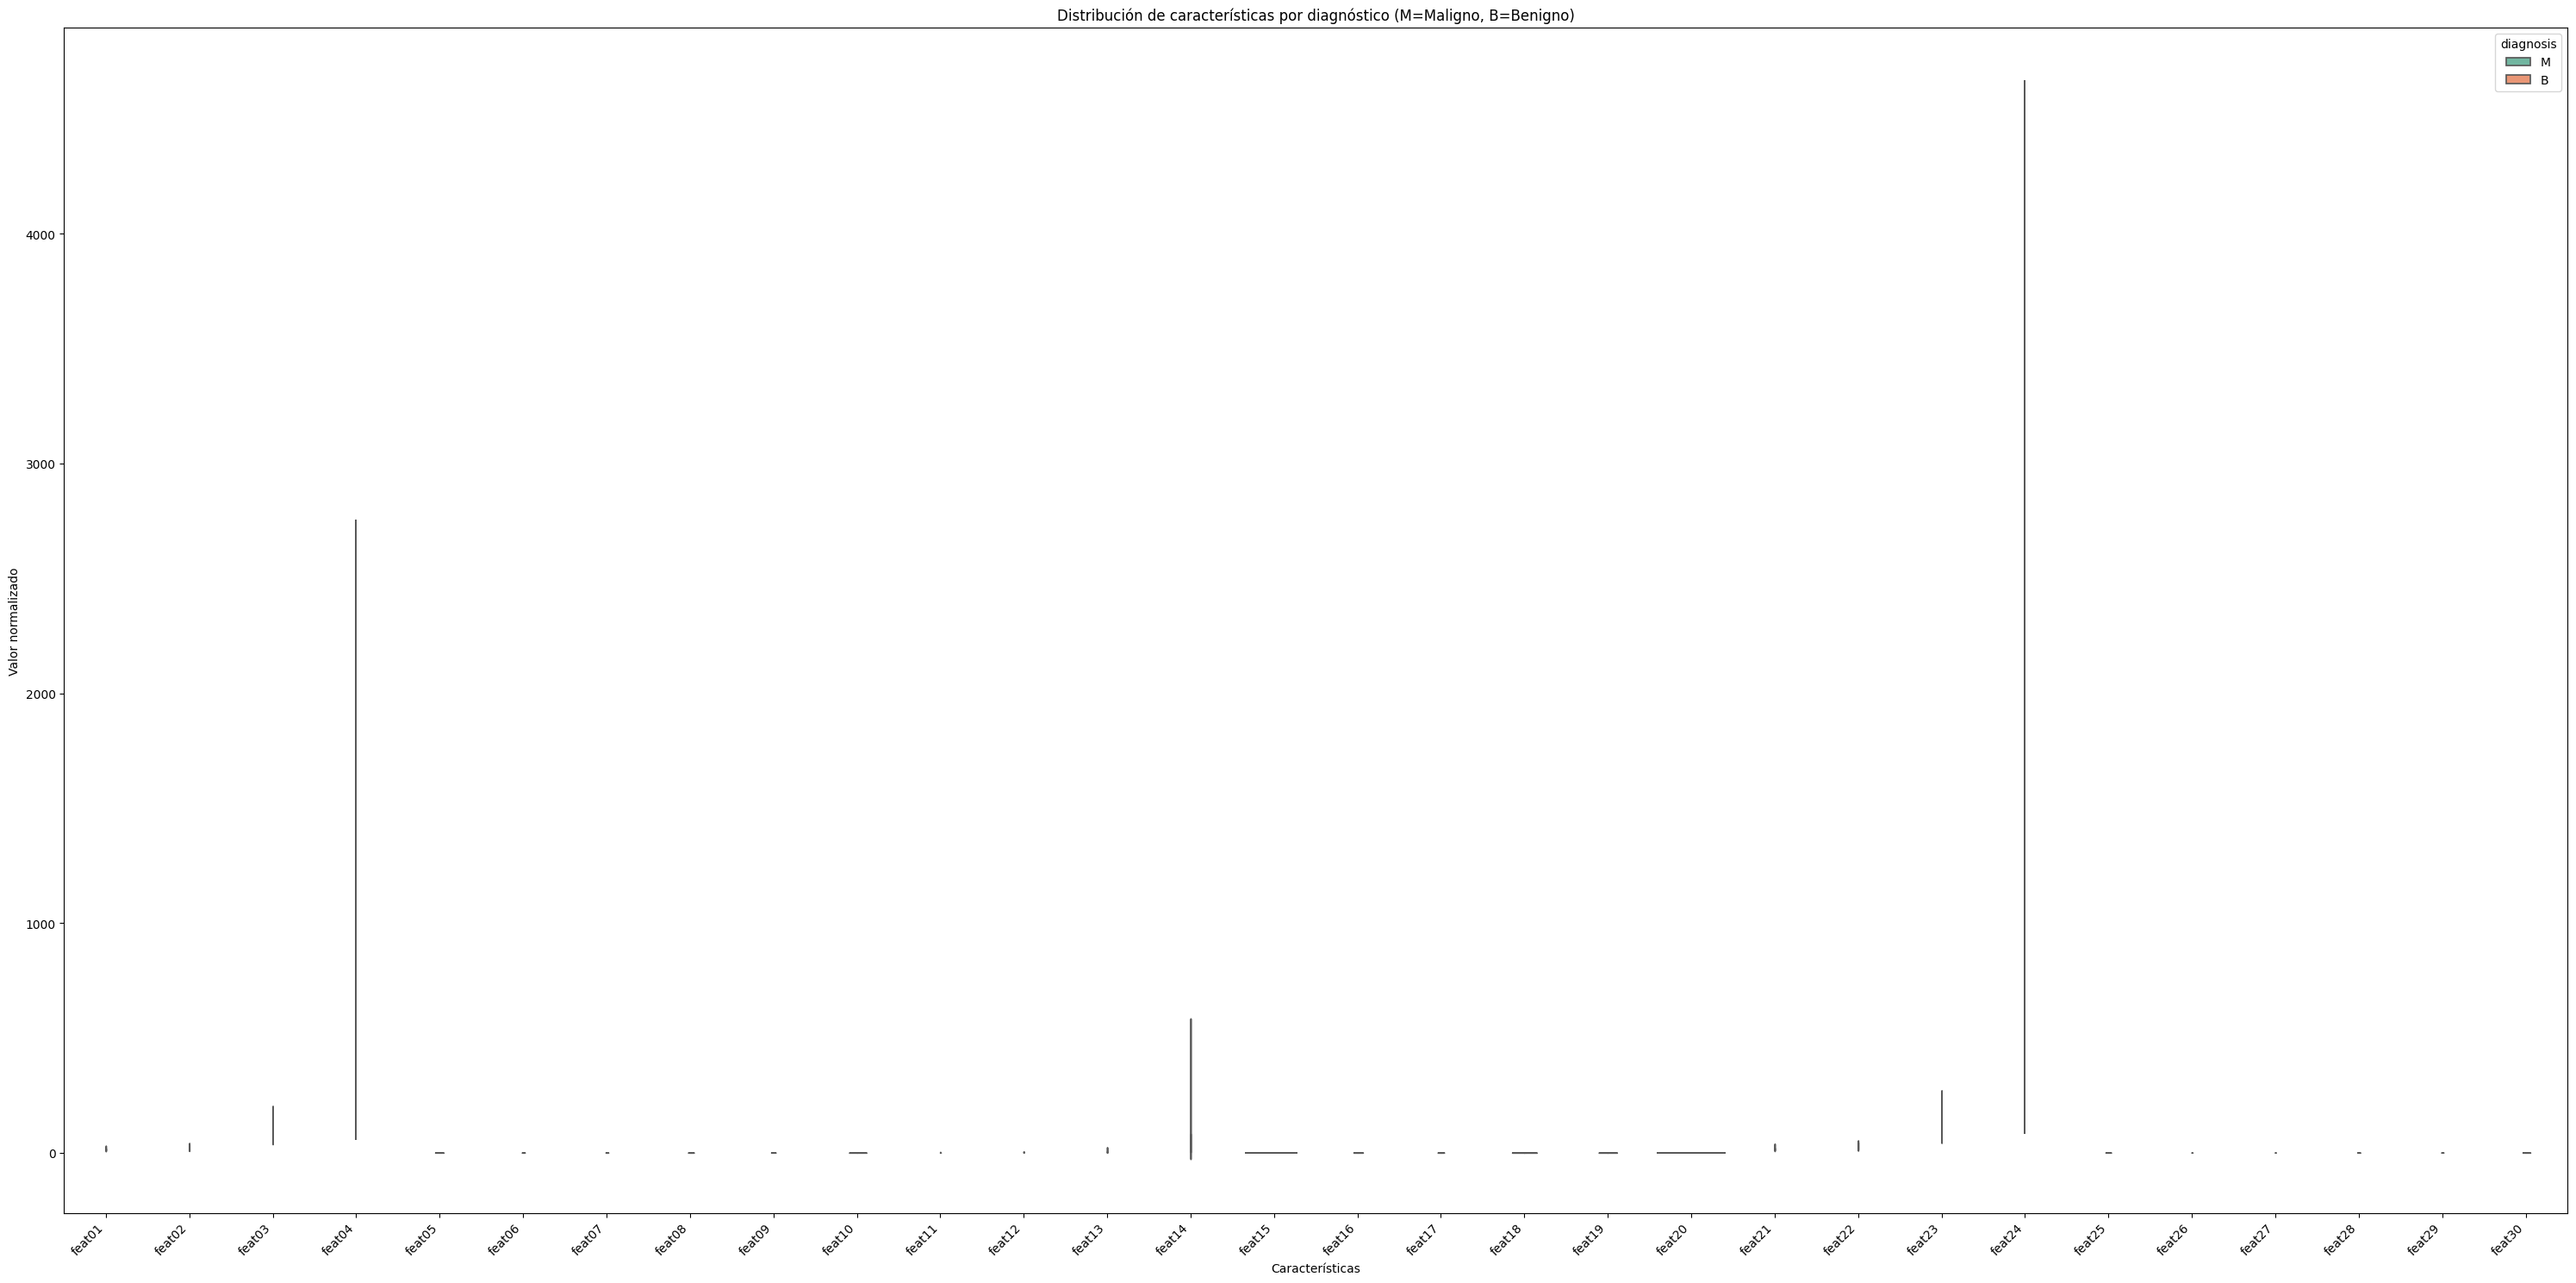

In [4]:
# Convertir los datos al formato largo (necesario para seaborn)
df_melted = pd.melt(df, 
                    id_vars=['diagnosis'],
                    value_vars=feature_names,
                    var_name='features',
                    value_name='value')

# Crear el gráfico
plt.figure(figsize=(30, 15))
sns.violinplot(x='features', 
               y='value', 
               hue='diagnosis',
               data=df_melted,
               split=True,
               inner='quart',
               palette='Set2')

# Configurar el gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de características por diagnóstico (M=Maligno, B=Benigno)')
plt.xlabel('Características')
plt.ylabel('Valor normalizado')

# Ajustar el layout
plt.tight_layout()
#plt.show()

### Análisis el gráfico del WBCD
El gráfico incluye:
- División del violín por diagnóstico (split=True)
- Visualización de cuartiles dentro del violín (inner='quart')
- Uso de colores diferentes para M y B con una leyenda
- La asimetría en los violines ahora será visible, mostrando las diferencias en la distribución entre casos malignos y benignos

1. La normalización ha funcionado correctamente ya que todos los datos están centrados alrededor de 0 y mayoritariamente entre -2 y 2 desviaciones estándar.
2. La mayoría de las características muestran una distribución bimodal (dos "bultos" en el violín), lo que sugiere una separación natural entre las clases benignas y malignas.
3. Algunas características como feat13, feat14 y feat24 muestran valores atípicos significativos (las líneas delgadas que se extienden hasta valores de 8-12), lo que podría indicar casos especialmente graves o mediciones inusuales.
4. La forma y anchura variada de los violines indica que diferentes características tienen distintos patrones de distribución, lo que sugiere que aportan información única y potencialmente valiosa para la clasificación.
5. Permite ver directamente cómo se distribuyen los valores para cada clase
6. La asimetría en los violines muestra las diferencias en la forma de la distribución entre casos malignos y benignos
7. Los cuartiles internos proporcionan información estadística adicional

##  Gráfico de dispersión con ruido (stripplot)
- Un tipo de gráfico de dispersión que muestra la distribución de puntos individuales para variables categóricas.
- Cada punto representa una observación individual, y el "jitter" (dispersión horizontal aleatoria) ayuda a evitar la superposición de puntos y permite ver mejor la distribución de los datos.
- El *"jitter"* (que es el término técnico en inglés) se refiere a una perturbación o ruido aleatorio que se añade a los puntos para evitar la superposición. 

In [6]:
# Convertir los datos al formato largo (necesario para seaborn)
df_melted = pd.melt(d, 
                    id_vars=['diagnosis'],
                    value_vars=feature_names,
                    var_name='features',
                    value_name='value')

# Configurar el estilo
sns.set(style="whitegrid")

# Crear el gráfico usando stripplot
plt.figure(figsize=(30, 15))
sns.stripplot(x='features', 
              y='value', 
              hue='diagnosis',
              data=df_melted,
              size=3,
              jitter = 0.3,
              alpha=0.4)    # Hace los puntos semitransparentes


# Configurar el gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de puntos por característica y diagnóstico')
plt.xlabel('Características')
plt.ylabel('Valor normalizado')

# Ajustar el layout
plt.tight_layout()
plt.show()

NameError: name 'd' is not defined

### Análisis el gráfico de enjambre
1. Separación de clases:
- Se observa una clara separación entre células benignas (B) y malignas (M) en varias características
- Las características relacionadas con "worst" (feat21-feat30) muestran una separación más marcada, lo que sugiere que podrían ser buenos predictores para la clasificación

2. Distribución de valores:
- La mayoría de las características tienen valores normalizados entre -2 y 2
- Hay varios valores atípicos (outliers) que se extienden más allá de estos límites
- Las células malignas (M) tienden a mostrar valores más altos en muchas características

3. Patrones interesantes:
- Algunas características muestran una superposición significativa entre B y M, lo que sugiere que por sí solas podrían no ser tan útiles para la clasificación
- Otras características muestran una clara separación, lo que las hace potencialmente más valiosas para el diagnóstico
- La densidad de puntos varía entre características, indicando diferentes niveles de variabilidad en las mediciones

Este gráfico complementa bien al gráfico violinplot, ya que nos permite ver la distribución real de los puntos individuales en lugar de solo las densidades agregadas.

## Visualizar la distribución de algunas características antes y después de la estandarización

InvalidIndexError: (slice(None, None, None), 0)

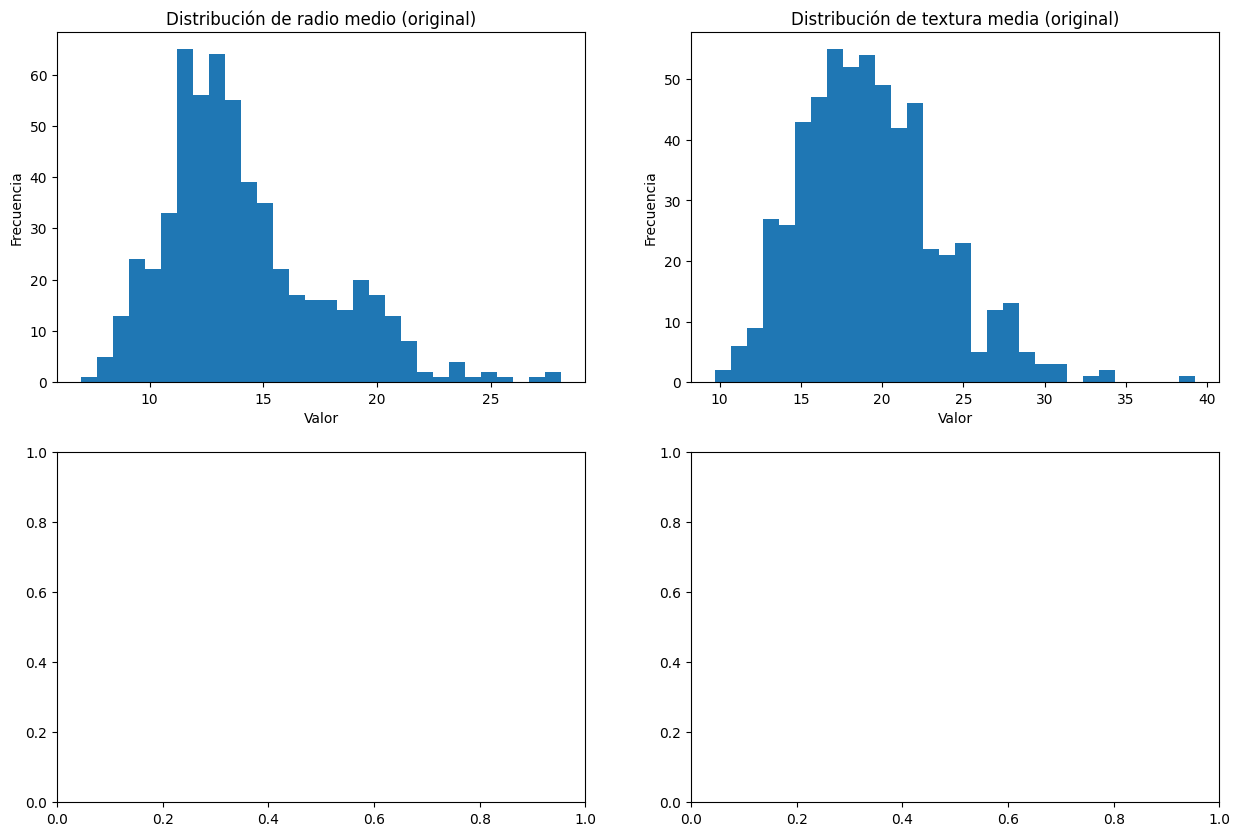

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Antes de la estandarización
axes[0,0].hist(df['feat01'], bins=30)
axes[0,0].set_title('Distribución de radio medio (original)')
axes[0,0].set_xlabel('Valor')
axes[0,0].set_ylabel('Frecuencia')

axes[0,1].hist(df['feat02'], bins=30)
axes[0,1].set_title('Distribución de textura media (original)')
axes[0,1].set_xlabel('Valor')
axes[0,1].set_ylabel('Frecuencia')

# Después de la estandarización
axes[1,0].hist(df[:,0], bins=30)
axes[1,0].set_title('Distribución de radio medio (estandarizado)')
axes[1,0].set_xlabel('Valor')
axes[1,0].set_ylabel('Frecuencia')

axes[1,1].hist(df_scaled[:,1], bins=30)
axes[1,1].set_title('Distribución de textura media (estandarizado)')
axes[1,1].set_xlabel('Valor')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Comentarios sobre los gráficos
- Los gráficos superiores muestran la distribución de los datos ORIGINALES, mientras que los inferiores muestran los datos ESTANDARIZADOS.
- La forma de las distribuciones se mantiene idéntica entre los gráficos superiores e inferiores, variando únicamente la escala horizontal. Esto comprueba que la estandarización no altera la distribución relativa de los datos.
- Se puede ver que en los datos estandarizados la media es cero y hay datos negativos y positivos.
- Las frecuencias (alturas de barras) son idénticas entre los gráficos superiores e inferiores, ya que la estandarización solo afecta a la escala de los valores, no a su frecuencia de aparición.